### SiC MOSFET - C2M0160120D
#### Ouliers Analysis and Removal using KDE and Box plots Visualisation 

- KDE plots
- Boxplots
- IQR-based outlier counts per column
(Optional exploring -Apply KMeans clustering, PCA)

*And final plotting and Detailed Summary Analysis of IQR-based outlier counts per column*

Loaded: mosfets_step2_no_zeros/C2M0160120D_no_zeros.csv with 158270 rows

KDE plots:


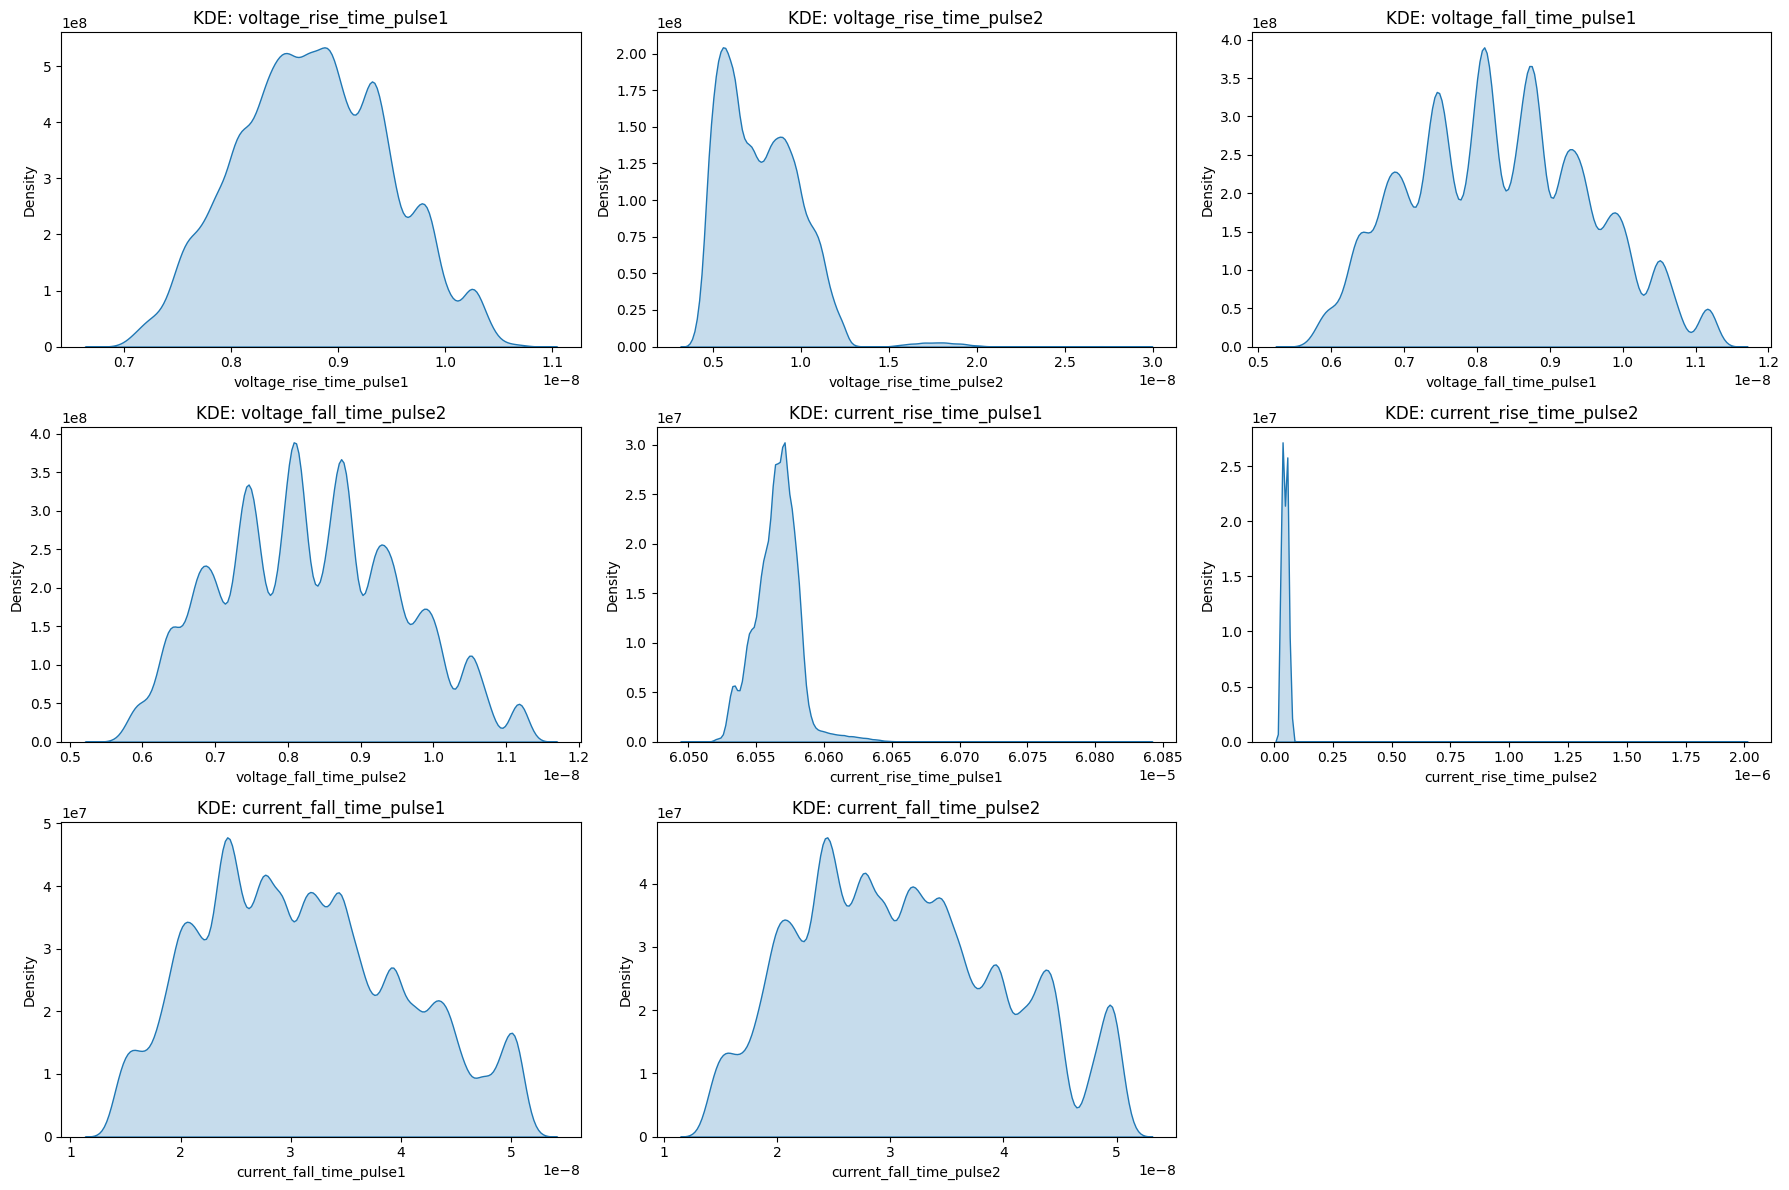

Boxplots:


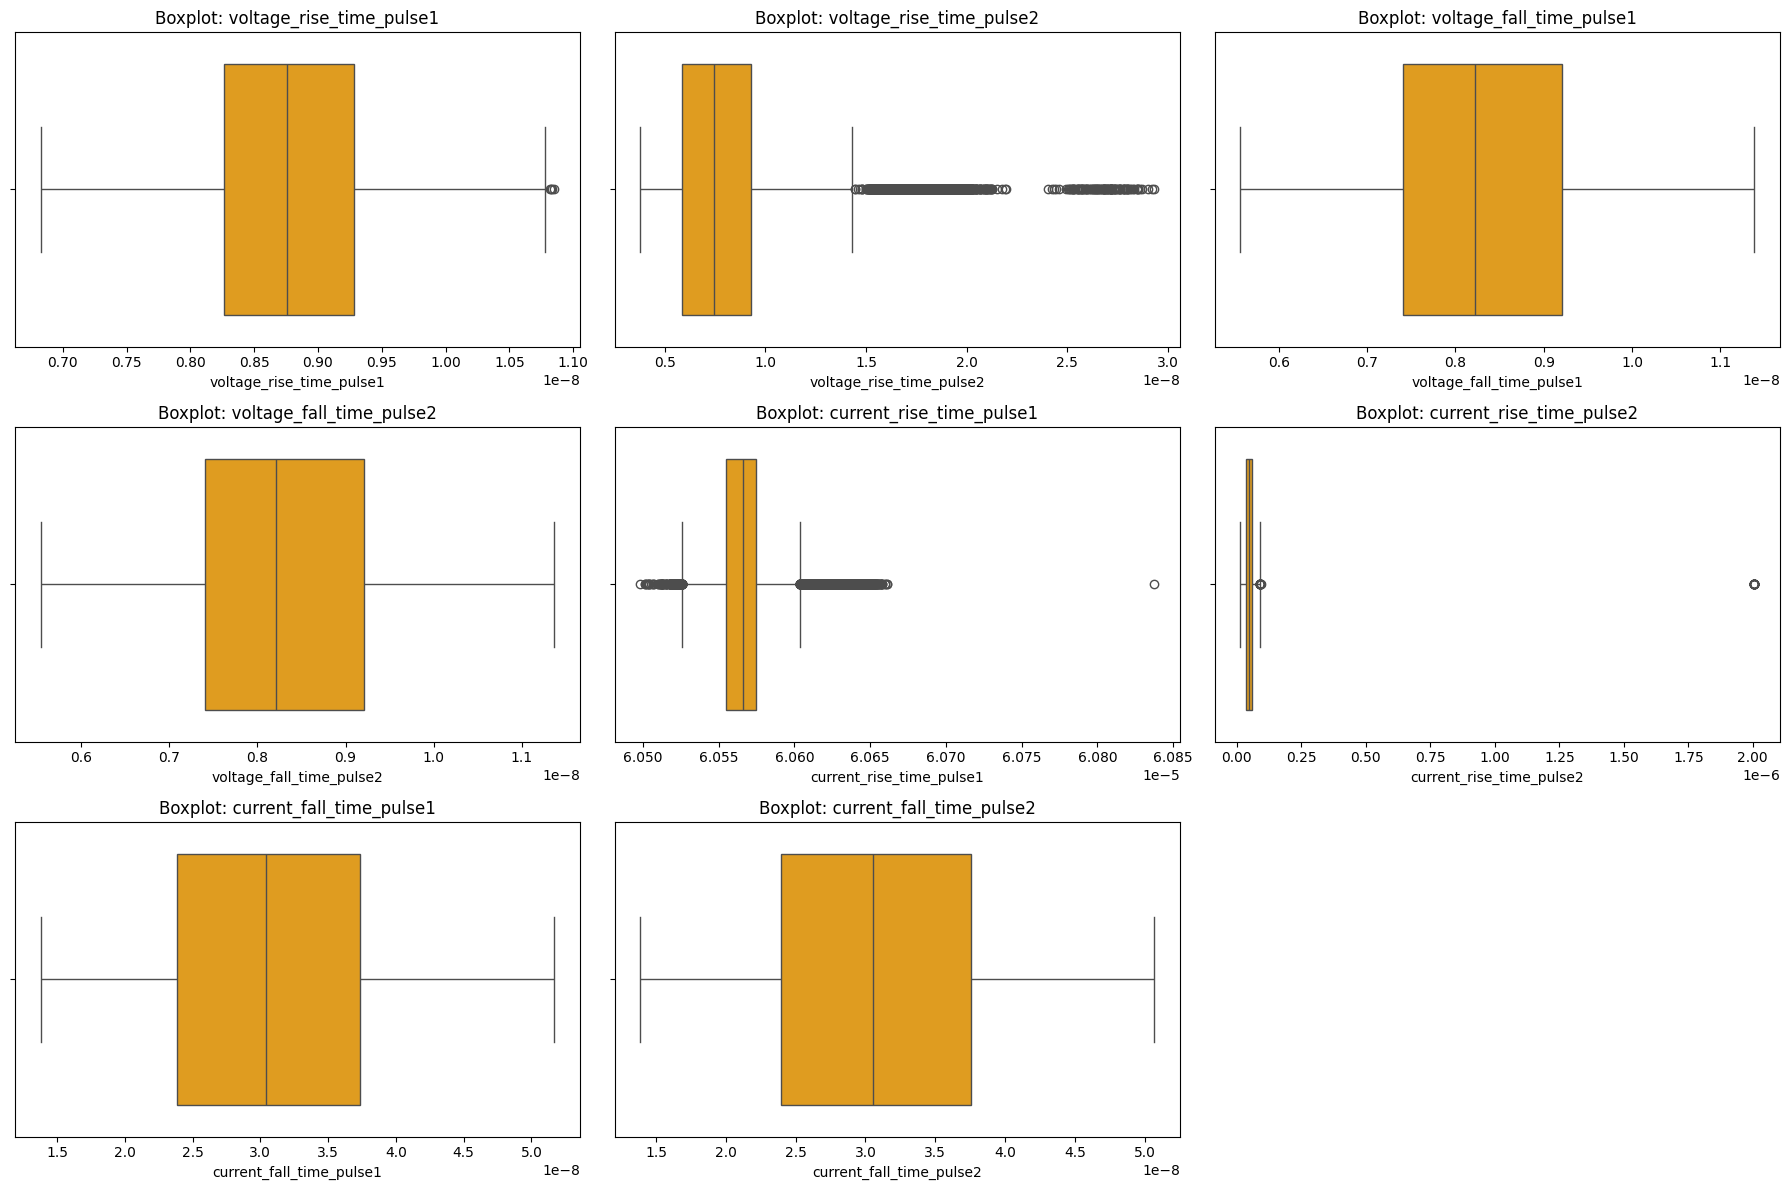

,count,mean,std,min,25%,50%,75%,max,range
voltage_rise_time_pulse1,158270.0,8.800000e-09,7.000000e-10,6.800000e-09,8.300000e-09,8.800000e-09,9.300000e-09,1.090000e-08,4.000000e-09
voltage_rise_time_pulse2,158270.0,7.700000e-09,2.300000e-09,3.800000e-09,5.900000e-09,7.400000e-09,9.300000e-09,2.930000e-08,2.560000e-08
voltage_fall_time_pulse1,158270.0,8.300000e-09,1.200000e-09,5.600000e-09,7.400000e-09,8.200000e-09,9.200000e-09,1.140000e-08,5.800000e-09
voltage_fall_time_pulse2,158270.0,8.300000e-09,1.200000e-09,5.500000e-09,7.400000e-09,8.200000e-09,9.200000e-09,1.140000e-08,5.800000e-09
current_rise_time_pulse1,158270.0,6.056500e-05,1.630000e-08,6.049840e-05,6.055510e-05,6.056580e-05,6.057460e-05,6.083770e-05,3.393000e-07
current_rise_time_pulse2,158270.0,4.610000e-08,2.800000e-08,1.350000e-08,3.510000e-08,4.630000e-08,5.700000e-08,2.005800e-06,1.992300e-06
current_fall_time_pulse1,158270.0,3.100000e-08,9.000000e-09,1.380000e-08,2.380000e-08,3.040000e-08,3.740000e-08,5.170000e-08,3.790000e-08
current_fall_time_pulse2,158270.0,3.110000e-08,9.000000e-09,1.390000e-08,2.390000e-08,3.050000e-08,3.760000e-08,5.070000e-08,3.680000e-08


IQR-based outlier counts per column:

voltage_rise_time_pulse1: 4 outliers
voltage_rise_time_pulse2: 1764 outliers
voltage_fall_time_pulse1: 0 outliers
voltage_fall_time_pulse2: 0 outliers
current_rise_time_pulse1: 3584 outliers
current_rise_time_pulse2: 52 outliers
current_fall_time_pulse1: 0 outliers
current_fall_time_pulse2: 0 outliers


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading the dataset of the mosfet C2M0025120D to remove the outliers 
FILE_PATH = "mosfets_step2_no_zeros/C2M0160120D_no_zeros.csv"  # Replace with other MOSFET file
df = pd.read_csv(FILE_PATH)
# The time columns from the output or target 
time_columns = [
    'voltage_rise_time_pulse1', 'voltage_rise_time_pulse2',
    'voltage_fall_time_pulse1', 'voltage_fall_time_pulse2',
    'current_rise_time_pulse1', 'current_rise_time_pulse2',
    'current_fall_time_pulse1', 'current_fall_time_pulse2'
]
# Just a quick display to check the right file and the rows 
print(f"Loaded: {FILE_PATH} with {len(df)} rows\n")

# KDE plotting for understanding the distribution and outliers
print("KDE plots:")
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()
for i, col in enumerate(time_columns):
    sns.kdeplot(df[col], ax=axes[i], fill=True)
    axes[i].set_title(f"KDE: {col}")
for j in range(len(time_columns), len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

# Box Plots for the ouliers
print("Boxplots:")
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()
for i, col in enumerate(time_columns):
    sns.boxplot(x=df[col], ax=axes[i], color='orange')
    axes[i].set_title(f"Boxplot: {col}")
for j in range(len(time_columns), len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()
# Adding the range and min and max to check 
describe_df = df[time_columns].describe().T
describe_df["range"] = describe_df["max"] - describe_df["min"]
display(describe_df.round(10))
# VERY IMPOTANT FOR UNDERSTANDING THE DISTRIBUTION
print("IQR-based outlier counts per column:\n")
for col in time_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")


In [2]:
# Removing the outliers from only 2 columns 
def remove_iqr_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

df_cleaned = remove_iqr_outliers(df, 'voltage_rise_time_pulse1')
df_cleaned = remove_iqr_outliers(df_cleaned, 'current_rise_time_pulse2')
print(f"\nFinal cleaned shape: {df_cleaned.shape} (removed only 4 + 52 = 56 rows)")


Final cleaned shape: (158214, 50) (removed only 4 + 52 = 56 rows)


In [3]:

print("IQR-based outlier counts per column:\n")
for col in time_columns:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_cleaned[(df_cleaned[col] < lower) | (df_cleaned[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

IQR-based outlier counts per column:

voltage_rise_time_pulse1: 0 outliers
voltage_rise_time_pulse2: 1764 outliers
voltage_fall_time_pulse1: 0 outliers
voltage_fall_time_pulse2: 0 outliers
current_rise_time_pulse1: 3582 outliers
current_rise_time_pulse2: 0 outliers
current_fall_time_pulse1: 0 outliers
current_fall_time_pulse2: 0 outliers


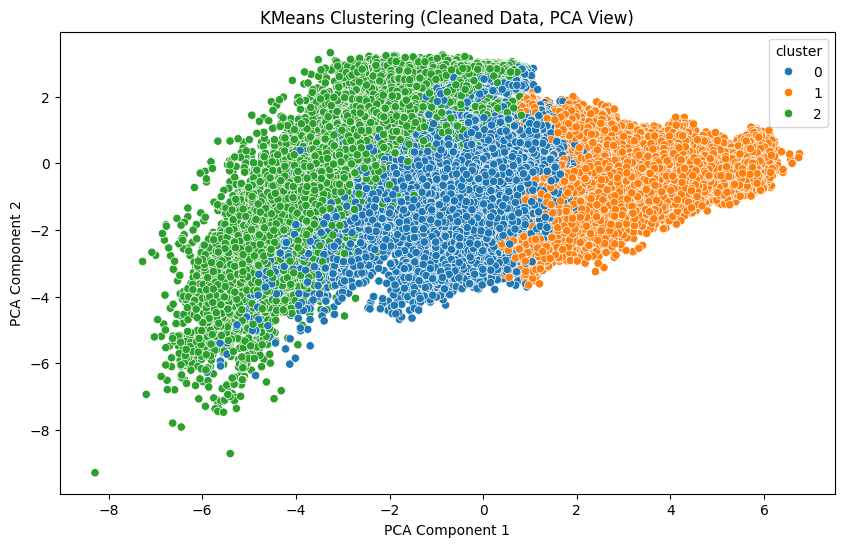


EMI Mean per Cluster:
         overshoot_pulse_1  overshoot_pulse_2  undershoot_pulse_1  \
cluster                                                             
0                  49.5748            34.7477            -51.8212   
1                  54.9528            28.7008            -43.0756   
2                  52.3684            54.5300            -50.4265   

         undershoot_pulse_2  ringing_frequency_MHz  
cluster                                             
0                  -51.8538                92.7137  
1                  -43.0768                91.1420  
2                  -50.4669                86.2801  


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Again the times columns 
time_cols = [
    'voltage_rise_time_pulse1', 'voltage_rise_time_pulse2',
    'voltage_fall_time_pulse1', 'voltage_fall_time_pulse2',
    'current_rise_time_pulse1', 'current_rise_time_pulse2',
    'current_fall_time_pulse1', 'current_fall_time_pulse2'
]

# The EMI - overshoot undershoot and the rining frquency solumns to compare
emi_cols = [
    'overshoot_pulse_1', 'overshoot_pulse_2',
    'undershoot_pulse_1', 'undershoot_pulse_2',
    'ringing_frequency_MHz'
]

# Again IQR based outlier
Q1 = df['voltage_rise_time_pulse1'].quantile(0.25)
Q3 = df['voltage_rise_time_pulse1'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Preparing the data for clustering===
features_for_clustering = time_cols + emi_cols
data = df_cleaned[features_for_clustering].dropna()

# Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# 3 clusters with KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

data['cluster'] = clusters

# PCA Visualisations
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
data['pca1'] = pca_result[:, 0]
data['pca2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='pca1', y='pca2', hue='cluster', palette='tab10')
plt.title("KMeans Clustering (Cleaned Data, PCA View)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

print("\nEMI Mean per Cluster:")
print(data.groupby("cluster")[emi_cols].mean().round(4))


KDE plots for EMI columns:


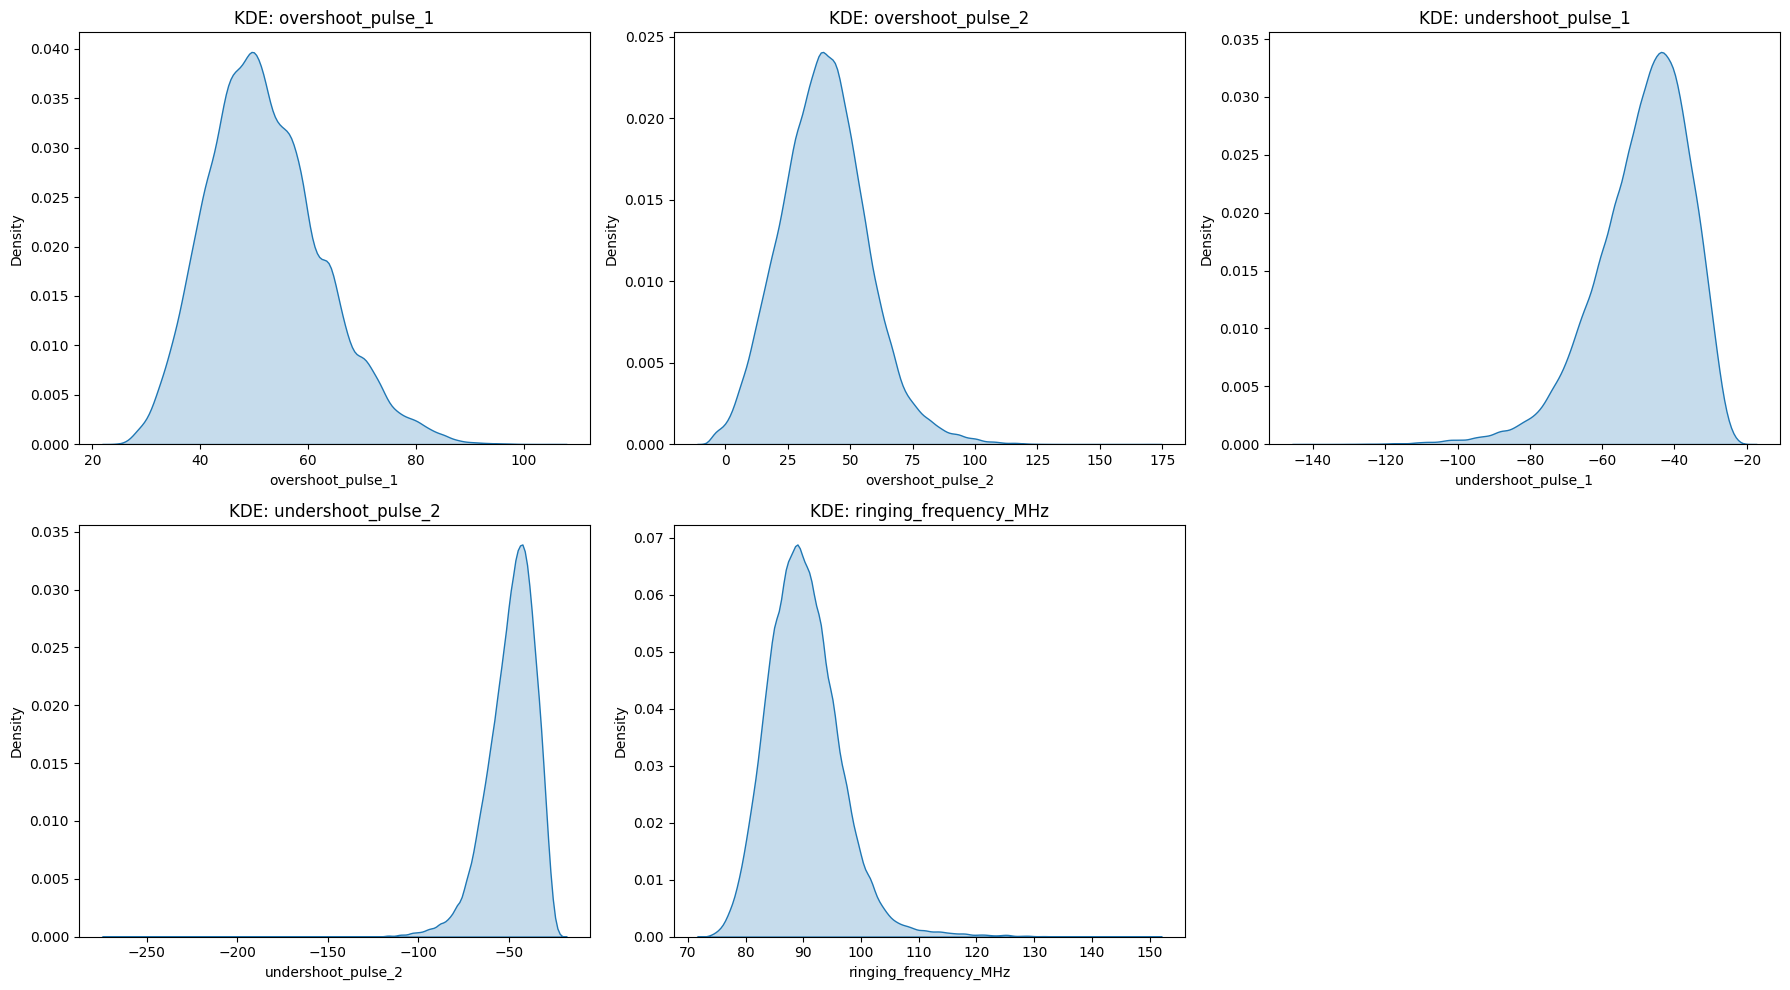

Boxplots for EMI columns:


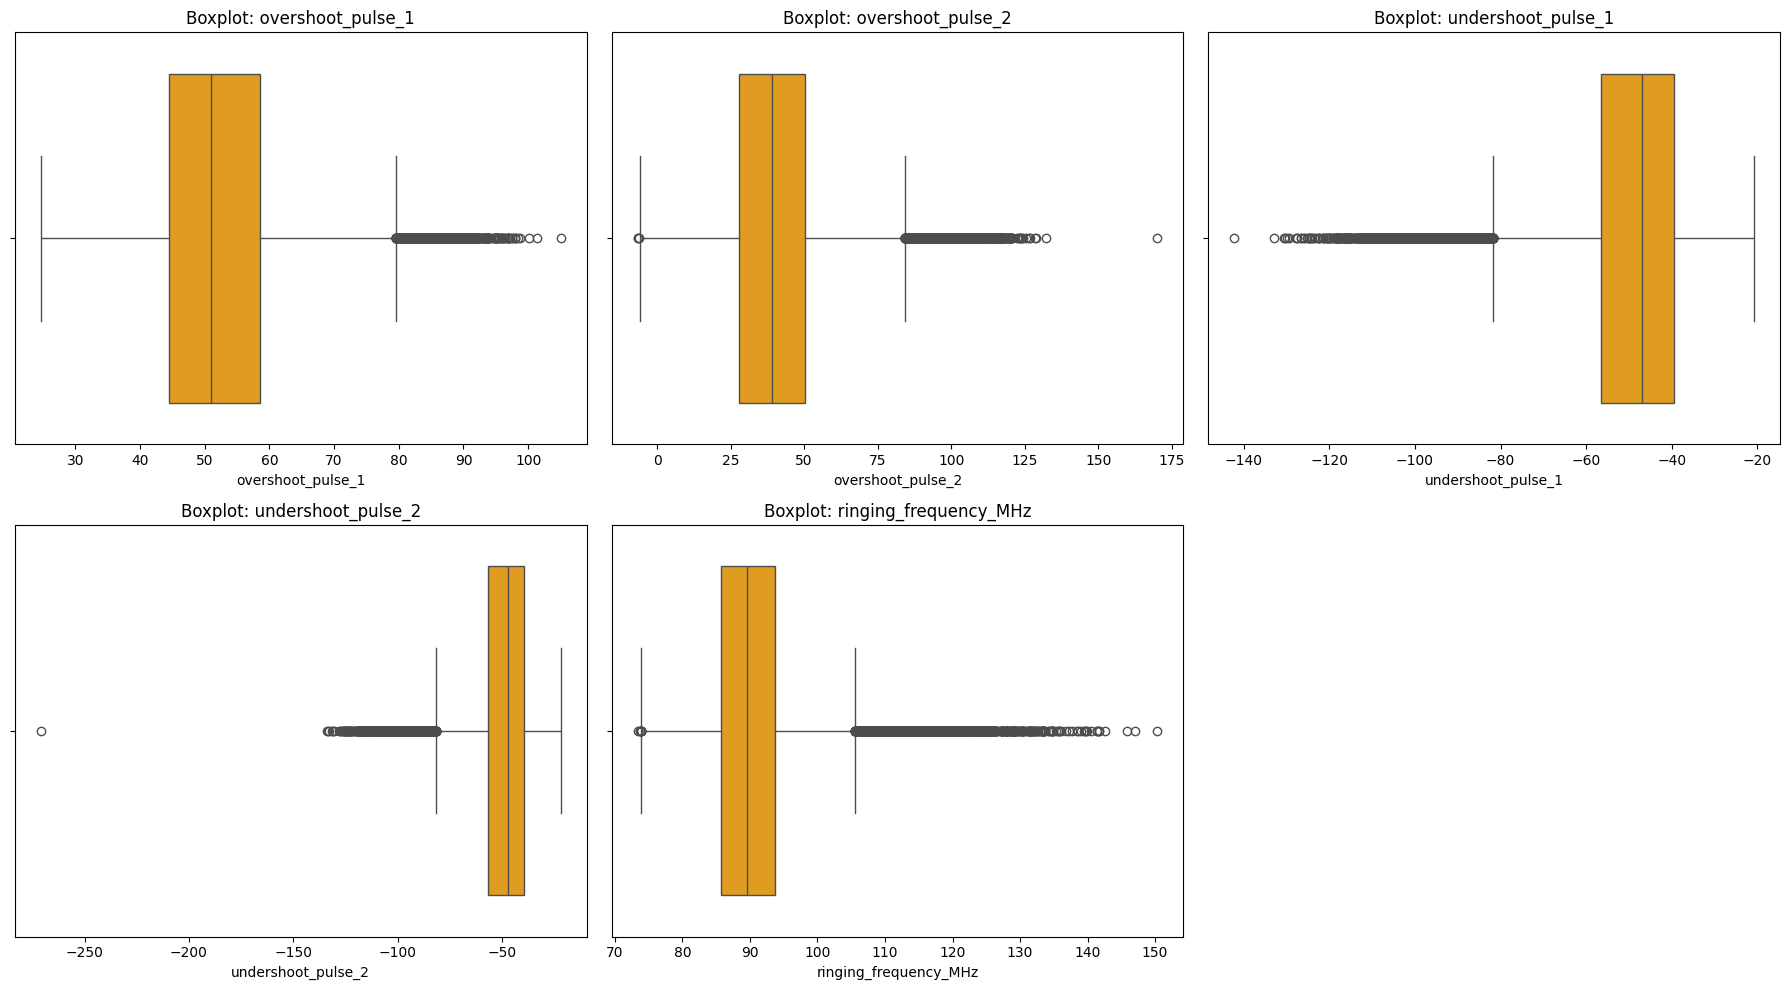

,count,mean,std,min,25%,50%,75%,max,range
overshoot_pulse_1,158214.0,51.9791,10.6002,24.6919,44.4624,50.9428,58.5164,105.0277,80.3358
overshoot_pulse_2,158214.0,39.6696,17.4415,-6.6256,27.8357,39.2448,50.4125,170.0587,176.6843
undershoot_pulse_1,158214.0,-48.9586,13.1541,-142.2158,-56.4247,-46.9878,-39.5279,-20.7903,121.4255
undershoot_pulse_2,158214.0,-48.9852,13.1689,-270.9748,-56.4304,-47.0130,-39.5578,-21.7767,249.1981
ringing_frequency_MHz,158214.0,90.1426,6.4184,73.3557,85.7754,89.5867,93.7059,150.3328,76.9771


IQR-based outlier counts for EMI columns:

overshoot_pulse_1: 1944 outliers
overshoot_pulse_2: 2045 outliers
undershoot_pulse_1: 3206 outliers
undershoot_pulse_2: 3231 outliers
ringing_frequency_MHz: 2919 outliers


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


emi_cols = [
    'overshoot_pulse_1', 'overshoot_pulse_2',
    'undershoot_pulse_1', 'undershoot_pulse_2',
    'ringing_frequency_MHz'
]
print("KDE plots for EMI columns:")
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(emi_cols):
    sns.kdeplot(df_cleaned[col], ax=axes[i], fill=True)
    axes[i].set_title(f"KDE: {col}")

for j in range(len(emi_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

print("Boxplots for EMI columns:")
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(emi_cols):
    sns.boxplot(x=df_cleaned[col], ax=axes[i], color='orange')
    axes[i].set_title(f"Boxplot: {col}")

for j in range(len(emi_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

describe_emi = df_cleaned[emi_cols].describe().T
describe_emi["range"] = describe_emi["max"] - describe_emi["min"]
display(describe_emi.round(4))
print("IQR-based outlier counts for EMI columns:\n")
for col in emi_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_cleaned[(df_cleaned[col] < lower) | (df_cleaned[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")


FINAL PLOTTING 

Null Value Count Per Target Column:
Series([], dtype: int64)

Negative Value Count (Rise/Fall Columns Only):
Series([], dtype: int64)

Final IQR-based Outlier Summary:


,min,max,iqr_lower,iqr_upper,outliers,range
overshoot_pulse_1,2.469189e+01,1.050277e+02,2.338129e+01,7.959754e+01,1944.0,8.033582e+01
overshoot_pulse_2,-6.625610e+00,1.700587e+02,-6.029457e+00,8.427761e+01,2045.0,1.766843e+02
undershoot_pulse_1,-1.422158e+02,-2.079028e+01,-8.176996e+01,-1.418261e+01,3206.0,1.214255e+02
undershoot_pulse_2,-2.709748e+02,-2.177668e+01,-8.173930e+01,-1.424883e+01,3231.0,2.491981e+02
ringing_frequency_MHz,7.335572e+01,1.503328e+02,7.387962e+01,1.056016e+02,2919.0,7.697706e+01
voltage_rise_time_pulse1,6.826415e-09,1.077586e-08,6.739709e-09,1.080945e-08,0.0,3.949447e-09
voltage_rise_time_pulse2,3.788899e-09,2.934228e-08,7.203517e-10,1.440552e-08,1764.0,2.555338e-08
voltage_fall_time_pulse1,5.565928e-09,1.138358e-08,4.704245e-09,1.191322e-08,0.0,5.817652e-09
voltage_fall_time_pulse2,5.542150e-09,1.136839e-08,4.691448e-09,1.192118e-08,0.0,5.826244e-09
current_rise_time_pulse1,6.049837e-05,6.083765e-05,6.052593e-05,6.060380e-05,3582.0,3.392838e-07


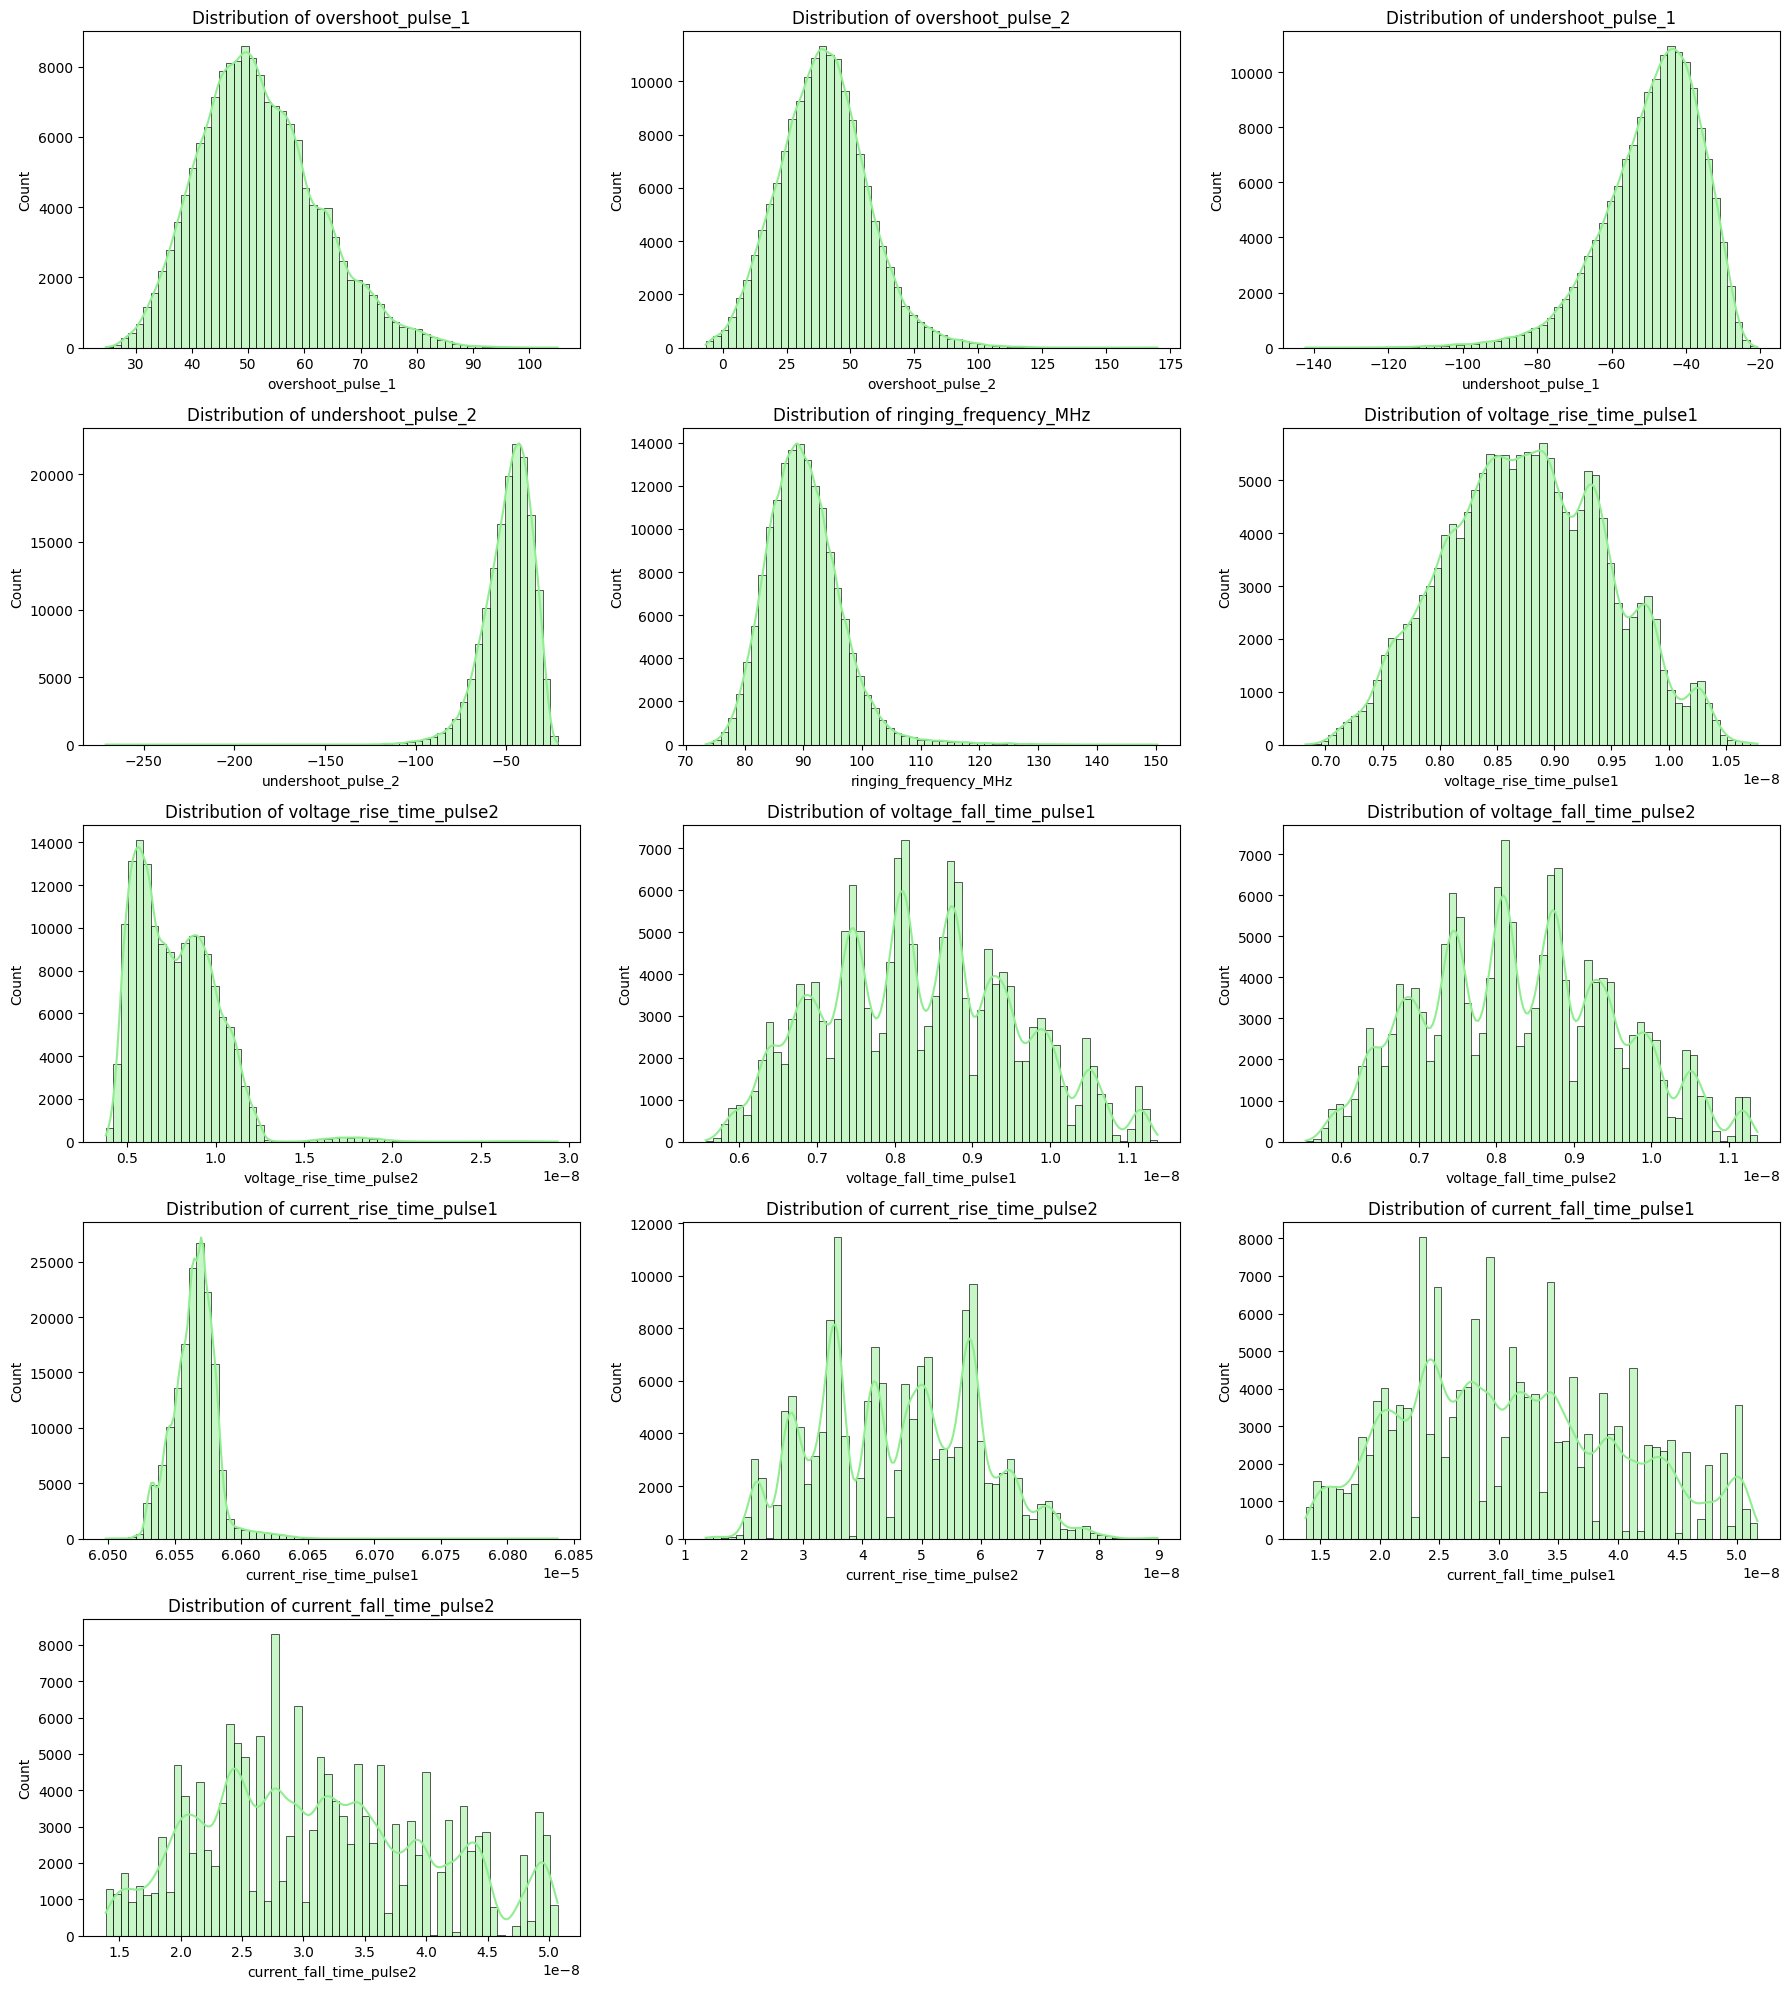

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# target columns for final analysis
target_columns = [
    'overshoot_pulse_1', 'overshoot_pulse_2',
    'undershoot_pulse_1', 'undershoot_pulse_2',
    'ringing_frequency_MHz',
    'voltage_rise_time_pulse1', 'voltage_rise_time_pulse2',
    'voltage_fall_time_pulse1', 'voltage_fall_time_pulse2',
    'current_rise_time_pulse1', 'current_rise_time_pulse2',
    'current_fall_time_pulse1', 'current_fall_time_pulse2',
]
df_filtered = df_cleaned

# negative values (should not exist for rise/fall, freq, overshoot)
null_counts = df_filtered[target_columns].isnull().sum()
print("Null Value Count Per Target Column:")
print(null_counts[null_counts > 0])
#IQR-based outliers
rise_fall_columns = [
    'voltage_rise_time_pulse1', 'voltage_rise_time_pulse2',
    'voltage_fall_time_pulse1', 'voltage_fall_time_pulse2',
    'current_rise_time_pulse1', 'current_rise_time_pulse2',
    'current_fall_time_pulse1', 'current_fall_time_pulse2',
]

check_negative = df_filtered[rise_fall_columns].lt(0)
negative_counts = check_negative.sum()
print("\nNegative Value Count (Rise/Fall Columns Only):")
print(negative_counts[negative_counts > 0])  # Show only problematic ones

#IQR-based outliers
outlier_stats = {}
for col in target_columns:
    Q1 = df_filtered[col].quantile(0.25)
    Q3 = df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_filtered[(df_filtered[col] < lower) | (df_filtered[col] > upper)]
    
    outlier_stats[col] = {
        'min': df_filtered[col].min(),
        'max': df_filtered[col].max(),
        'iqr_lower': lower,
        'iqr_upper': upper,
        'outliers': len(outliers),
        'range': df_filtered[col].max() - df_filtered[col].min()
    }

summary_df = pd.DataFrame(outlier_stats).T
print("\nFinal IQR-based Outlier Summary:")
display(summary_df)

# Plot final cleaned EMI output distributions 
n_cols = 3
n_rows = (len(target_columns) + n_cols - 1) // n_cols
fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axs = axs.flatten()

for i, col in enumerate(target_columns):
    sns.histplot(df_filtered[col], bins=60, kde=True, ax=axs[i], color='lightgreen')
    axs[i].set_title(f"Distribution of {col}")
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Count")
for j in range(len(target_columns), len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


In [7]:
df_filtered.to_csv('mosfets_step3_final_cleaned/C2M0160120D_cleaned.csv', index=False)
print("Saved to: mosfets_step3_final_cleaned/C2M0160120D_cleaned.csv")


Saved to: mosfets_step3_final_cleaned/C2M0160120D_cleaned.csv
